<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2025/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.ndimage as nd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Edge Localiztion

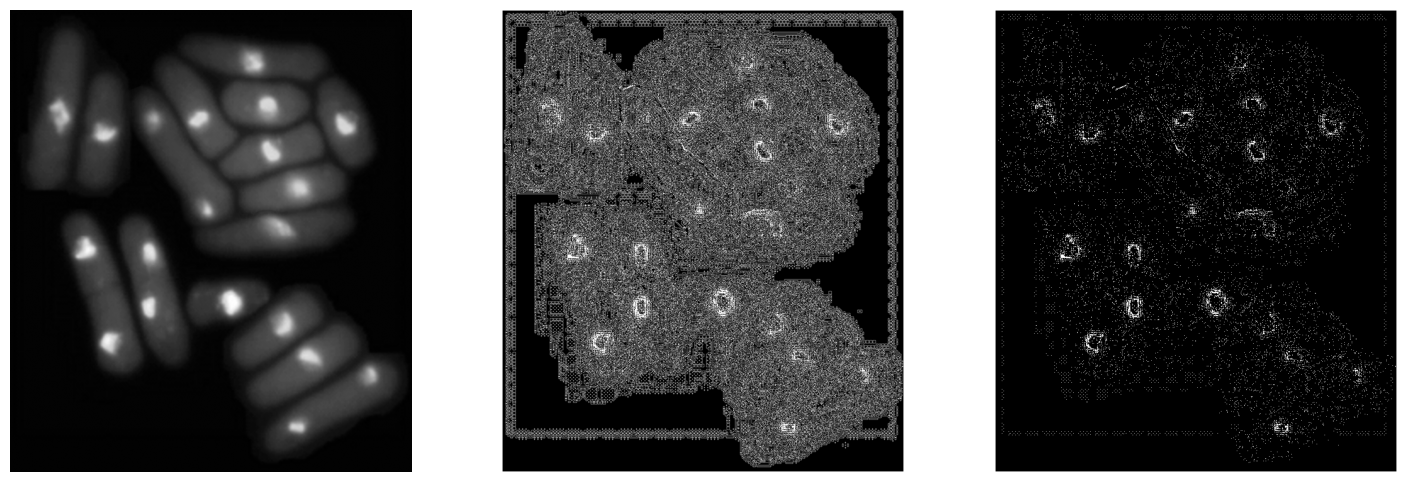

In [3]:
I = Image.open(imgpath+'/yeast-cells.tif')
f = np.array(I)

lap=np.array([[0,1,0],[1,-4,1],[0,1,0]])
f_lap = signal.convolve2d(f,lap,'same')
T = 4
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.abs(f_lap),cmap='gray',vmin=0,vmax=T)
plt.axis('off')
plt.subplot(133)
plt.imshow(np.abs(f_lap)>=T,cmap='gray')
plt.axis('off')
plt.show()

## Basic Global Thresholding

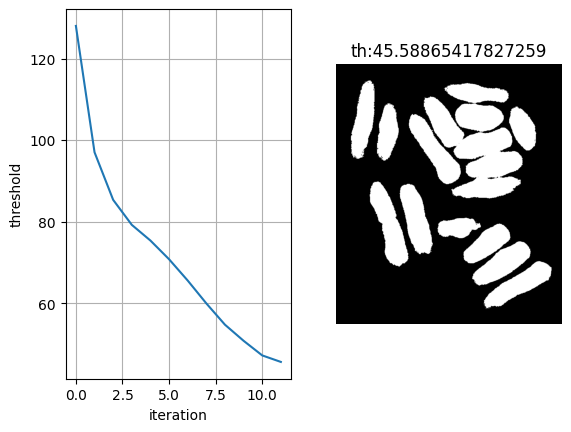

In [4]:
T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
## write down your algorithm
while dT>esp:

  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

## Otsu's method

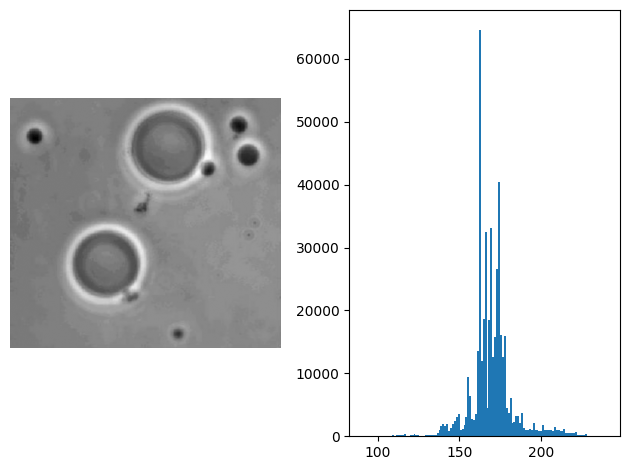

In [5]:
I = Image.open(imgpath+'/polymercell.tif')
f = np.array(I)
plt.subplot(121)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.hist(f.flatten(),128)
plt.tight_layout()
plt.show()

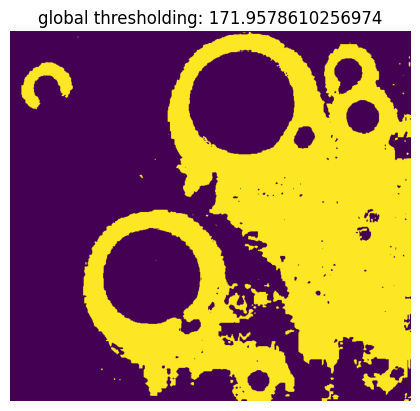

In [6]:
# global basic thresholding
T_init = 172
T = []
T.append(T_init)
dT = 1000
esp = 5
## write down your algorithm
while dT>esp:

  dT = np.abs(T[-1]-T[-2])
T_global = T[-1]
msk_g = f>T_global

plt.imshow(msk_g)
plt.title(f'global thresholding: {T_global}')
plt.axis('off')
plt.show()

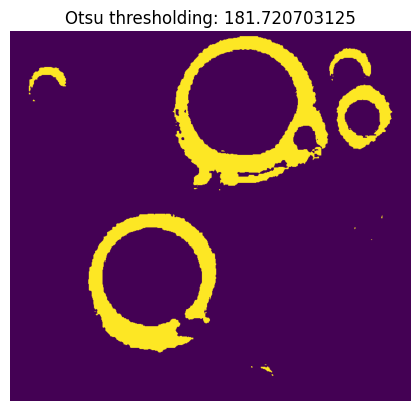

In [7]:
# Otsu's method
hist, bin_edges = np.histogram(f, bins = 256, range=(f.min(), f.max()))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

weight1 = np.cumsum(hist)                 # w0(k)
weight2 = np.sum(hist) - weight1          # w1(k)
m_cumsum = np.cumsum(hist * bin_centers)  # ∑ i * p(i)
mean1 = np.divide(m_cumsum, weight1, out=np.zeros_like(m_cumsum), where=weight1>0)
mean2 = np.divide(m_cumsum[-1] - m_cumsum, weight2,
                  out=np.zeros_like(m_cumsum), where=weight2>0)

# σ_b^2 = w0 * w1 * (μ0 - μ1)^2
sigma_b2 = weight1 * weight2 * (mean1 - mean2) ** 2

k = np.argmax(sigma_b2)
T_otsu = float(bin_centers[k])  # 임계값
T_otsu

msk_otsu = f>T_otsu

plt.imshow(msk_otsu)
plt.title(f'Otsu thresholding: {T_otsu}')
plt.axis('off')
plt.show()

## Variable Thresholding

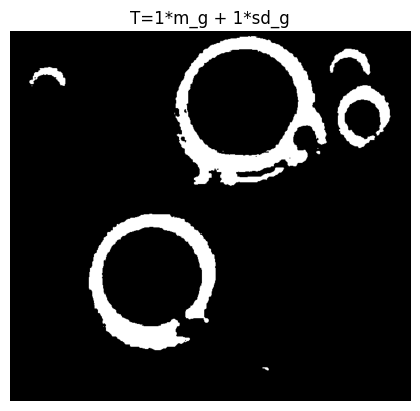

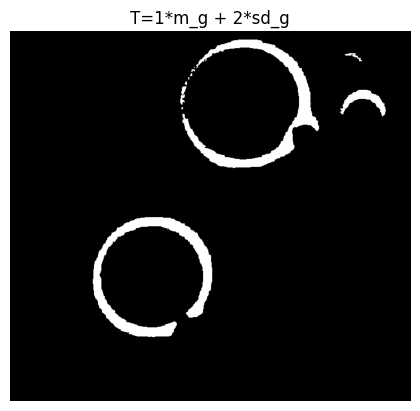

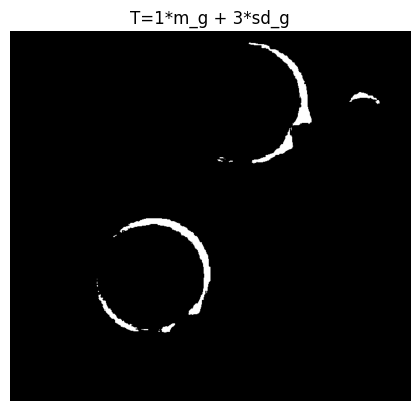

In [8]:
a=1
b_vals=[1,2,3]
for b in b_vals:
  m_g = np.mean(f)
  sd_g = np.std(f)
  T = a*m_g+b*sd_g
  plt.imshow(f>T,cmap='gray')
  plt.axis('off')
  plt.title(f'T={a}*m_g + {b}*sd_g')
  plt.show()

## Using Edges to Improve Global Thresholding

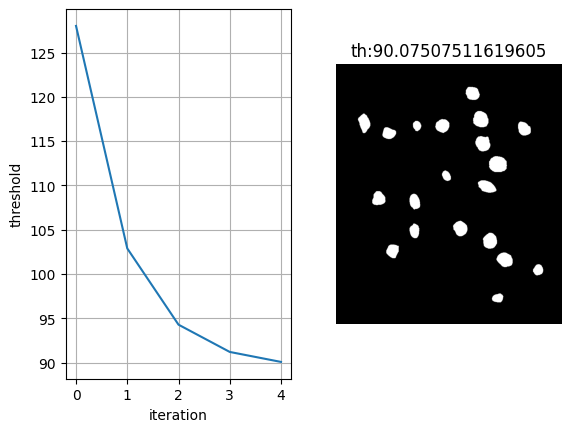

In [10]:
I = Image.open(imgpath+'/yeast-cells.tif')
f = np.array(I)
lap=np.array([[0,1,0],[1,-4,1],[0,1,0]])
f_lap = signal.convolve2d(f,lap,'same')

T_init = 128
T = []
T.append(T_init)
dT = 1000
esp = 2
f_msk = f[np.abs(f_lap)>=4]
## write down your algorithm
while dT>esp:


  dT = np.abs(T[-1]-T[-2])

bmsk = f>T[-1]
plt.subplot(122)
plt.imshow(bmsk,cmap='gray')
plt.axis('off')
plt.title(f'th:{T[-1]}')
plt.subplot(121)
plt.plot(np.arange(len(T)),T)
plt.xlabel('iteration')
plt.ylabel('threshold')
plt.grid('on')
plt.show()

## K-means clustering

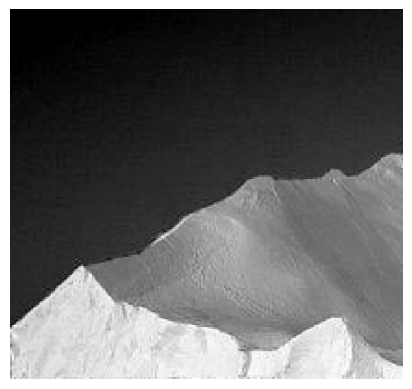

In [11]:
I = Image.open(imgpath+'/iceberg.tif')
#f = np.array(I)
f = np.array(I).astype(np.int16)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

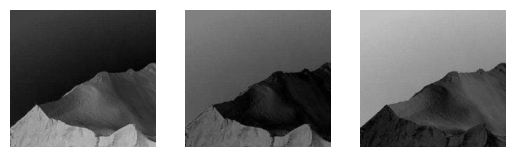

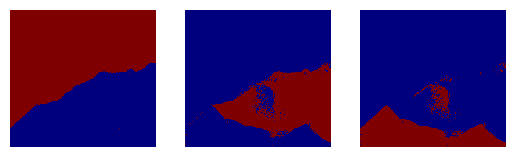

In [12]:
m_vals = [64, 128, 192]
c = np.zeros((f.shape[0],f.shape[1],len(m_vals)))

for i in range(len(m_vals)):
  c[:,:,i] = np.abs(f-m_vals[i])

# distance maps
plt.subplot(131)
plt.imshow(c[:,:,0],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(c[:,:,1],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(c[:,:,2],vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

# k-means clustering (1st iteration)
cmap = np.argmin(c,axis=-1)
plt.subplot(131)
plt.imshow(cmap==0,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.subplot(132)
plt.imshow(cmap==1,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.subplot(133)
plt.imshow(cmap==2,interpolation='nearest',cmap='jet')
plt.axis('off')
plt.show()

## Exercise
- 강의노트의 "standard" k-means clustering algorithm을 완성하여 iceberg.tif 및 s01.nii.gz 파일에 적용해보자.
- k=2,3,4 일 때의 결과를 iceberg.tif, s01.nii.gz에 대해 각각 비교해보자.

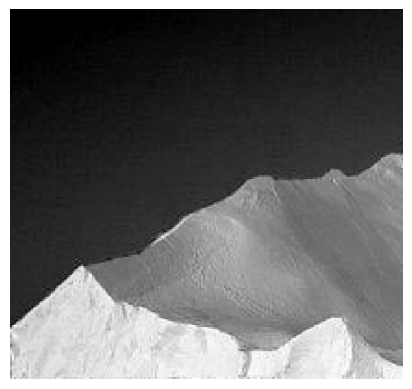

In [13]:
I = Image.open(imgpath+'/iceberg.tif')
f = np.array(I)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
m_vals = np.array([64., 128., 192.])
c = np.zeros((f.shape[0],f.shape[1],len(m_vals)))
cmap = np.zeros_like(f)
m_vals_new = np.zeros(m_vals.shape)
E=10000
eps = 1
cmap = np.argmin(c,axis=-1)

while E>eps:
  print(m_vals)
  ##

  # your k-means clustering algorithm #

    ##


for i in range(len(m_vals)):
  plt.subplot(1,len(m_vals),i+1)
  plt.imshow(cmap==i,cmap='jet',interpolation='nearest')
  plt.axis('off')
plt.show()


In [15]:
!pip install nibabel

In [16]:
import nibabel as nib

In [17]:
h = nib.load('s01.nii.gz')

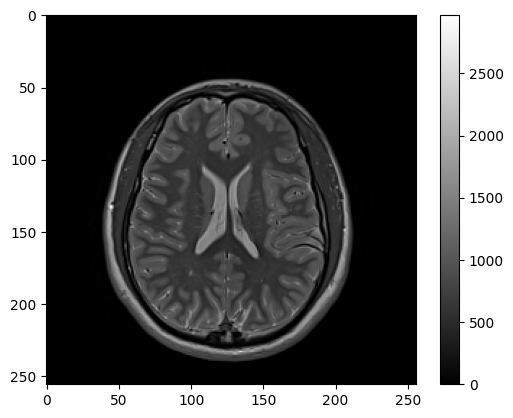

In [18]:
mri = h.get_fdata()
f = mri[::-1,::-1,22].transpose((1,0))
plt.imshow(f,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
m_vals = np.array([64., 128.,256.])
c = np.zeros((f.shape[0],f.shape[1],len(m_vals)))
cmap = np.zeros_like(f)
m_vals_new = np.zeros(m_vals.shape)
E=10000
eps = 1
cmap = np.argmin(c,axis=-1)
while E>eps:
  print(m_vals)
  ##

  # your k-means clustering algorithm #

    ##


for i in range(len(m_vals)):
  plt.subplot(1,len(m_vals),i+1)
  plt.imshow(cmap==i,cmap='jet',interpolation='nearest')
  plt.axis('off')
plt.show()
